In [1]:
# Import libraries
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [2]:
# take a look at the dataset
df <- read.csv('ex4-crimerates-by-state-2005.csv')
head(df)

state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7,295753151
Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049
Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488
Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834
Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221
California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,35795255


***Scatterplot***

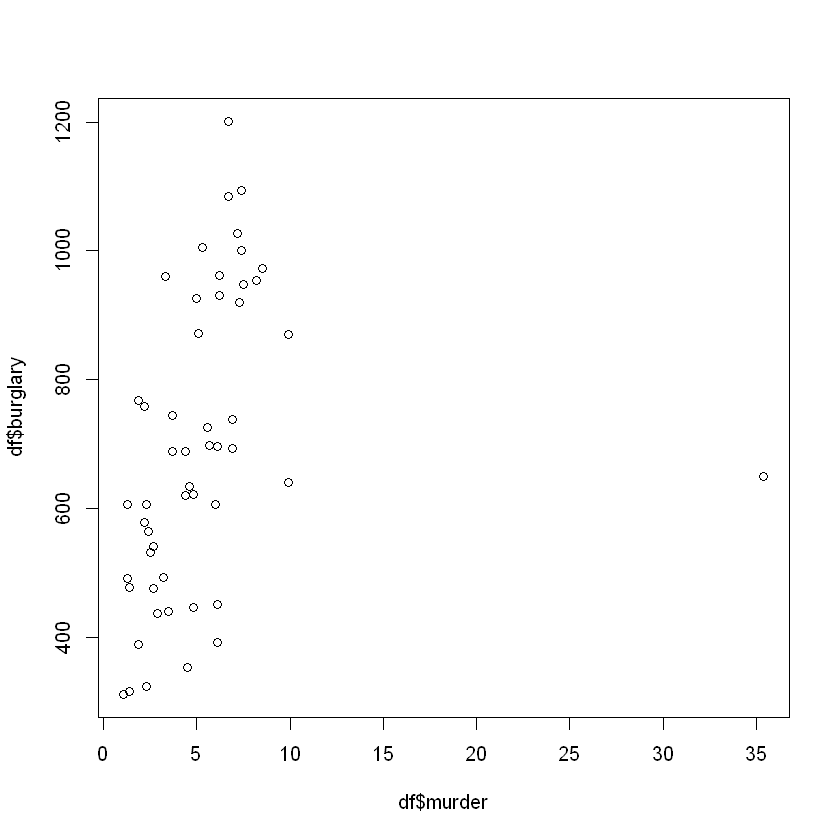

In [3]:
# Initial scatterplot
plot(df$murder, df$burglary)

In [4]:
# Remove outlier
df2 <- df[df$state != "District of Columbia",]

# Remove United States average
df2 <- df2[df2$state != "United States",]

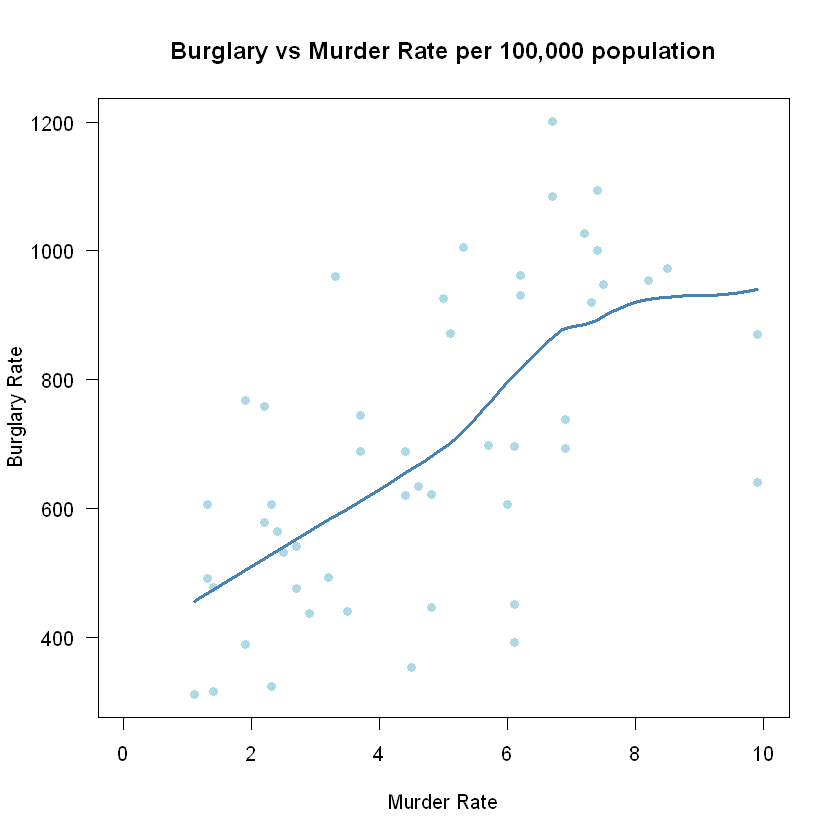

In [59]:
# Create a scatterplot with LOESS curve and define axes
scatter.smooth(df2$murder, df2$burglary, xlab="Murder Rate", ylab="Burglary Rate", 
               xlim=c(0,10), yaxt="none", pch=16, col="lightblue", 
               main="Burglary vs Murder Rate per 100,000 population", 
              lpars = list(col = "steelblue", lwd = 3)) 
axis(2, seq(0,1200,200),las=2)

***Bubble Chart***

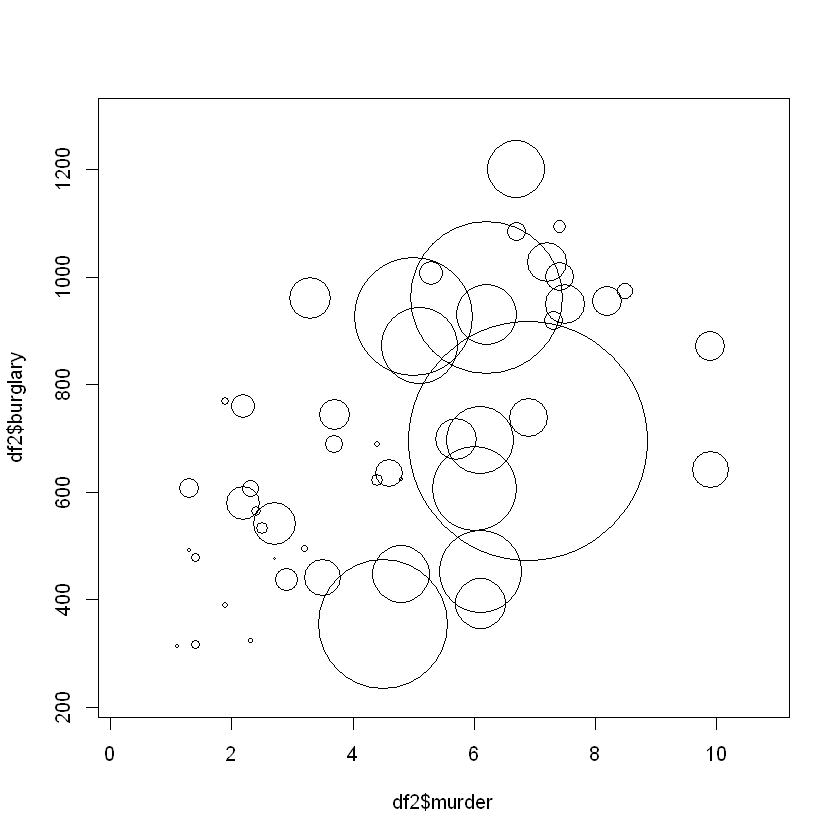

In [31]:
# Initial bubble chart
symbols(df2$murder, df2$burglary, circles=df2$population)

In [32]:
# Change the circle size to represent population by area vs radius size
radius <- sqrt(df2$population/ pi)

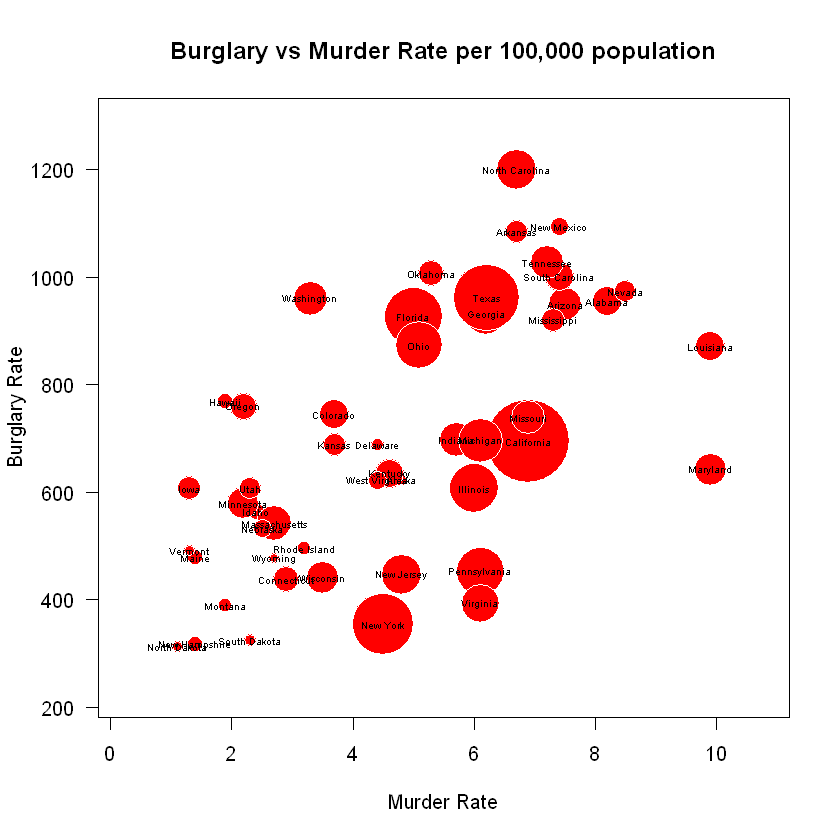

In [39]:
# Refined bubble chart 
symbols(df2$murder, df2$burglary, circles=radius, inches=0.35, fg="white", bg="red", xlab="Murder Rate", 
        ylab="Burglary Rate", yaxt="none", main="Burglary vs Murder Rate per 100,000 population")
axis(2, seq(0,1200,200),las=2)
text(df2$murder, df2$burglary, df2$state, cex=0.5)

***Density Plot***

In [41]:
# take a look at the dataset
birth <- read.csv('ex4-birth-rate.csv')
head(birth)

Country,X1960,X1961,X1962,X1963,X1964,X1965,X1966,X1967,X1968,...,X1999,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008
Aruba,36.40000,35.179,33.863,32.459,30.994,29.51300,28.069,26.721,25.518,...,15.02400,14.5280,14.04100,13.57900,13.15300,12.77200,12.44100,12.15900,11.91900,11.71600
Afghanistan,52.20100,52.206,52.208,52.204,52.192,52.16800,52.130,52.076,52.006,...,51.22900,50.9030,50.48600,49.98400,49.41600,48.80300,48.17700,47.57500,47.02300,46.53800
Angola,54.43200,54.394,54.317,54.199,54.040,53.83600,53.585,53.296,52.984,...,48.66200,48.3550,48.00500,47.54500,46.93600,46.18400,45.33000,44.44400,43.60700,42.87500
Albania,40.88600,40.312,39.604,38.792,37.913,37.00800,36.112,35.245,34.421,...,17.71300,16.8500,16.08100,15.44400,14.96200,14.64400,14.48500,14.46400,14.53400,14.64900
Netherlands Antilles,32.32100,30.987,29.618,28.229,26.849,25.51800,24.280,23.173,22.230,...,15.80900,15.4120,15.09600,14.82400,14.56500,14.30900,14.05100,13.79000,13.53200,13.28100
Arab World,47.61122,NA,NA,NA,NA,46.57288,NA,NA,NA,...,29.07314,28.6828,28.30524,27.96244,27.67007,27.37897,27.11886,26.85532,26.59352,26.32405


In [44]:
# Pull out at subset of the data
birth2008 <- birth$X2008[!is.na(birth$X2008)]

In [45]:
# Pass data to density function to estimate a curve and store the results
d2008 <- density(birth2008)

In [47]:
# Look at what is stored in d2008
d2008


Call:
	density.default(x = birth2008)

Data: birth2008 (219 obs.);	Bandwidth 'bw' = 3.168

       x                y            
 Min.   :-1.299   Min.   :6.480e-06  
 1st Qu.:14.786   1st Qu.:1.433e-03  
 Median :30.870   Median :1.466e-02  
 Mean   :30.870   Mean   :1.553e-02  
 3rd Qu.:46.954   3rd Qu.:2.646e-02  
 Max.   :63.039   Max.   :4.408e-02  

In [48]:
# Write to a file to use in Tableau
d2008frame <- data.frame(d2008$x, d2008$y)
write.table(d2008frame, "birthdensity.txt", sep=",", row.names=FALSE)

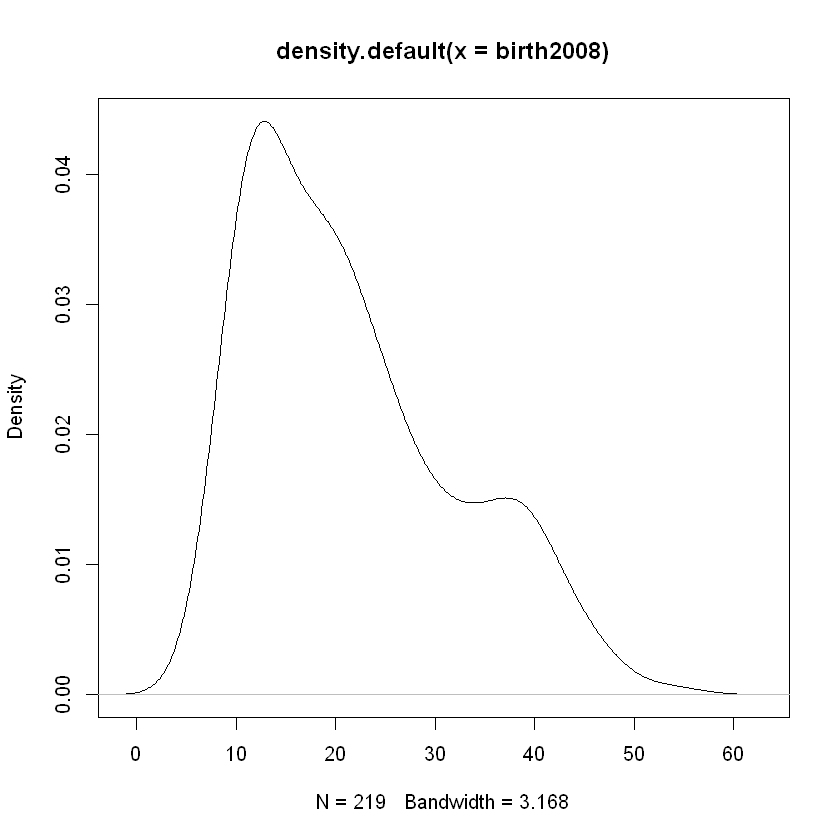

In [49]:
# Initial density plot
plot(d2008)

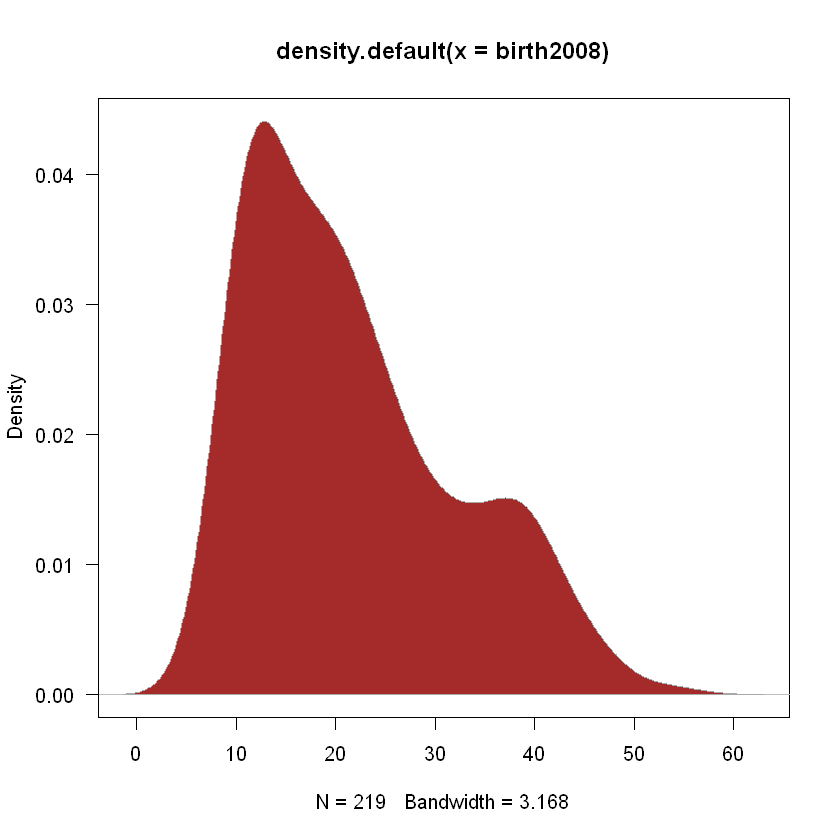

In [53]:
# Plot a filled density chart
plot(d2008, type="n", yaxt="none")
polygon(d2008, col="brown", border="darkgray")
axis(2,las=2)